# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic 

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'
titanic = pd.read_csv(url)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Step 4. Set PassengerId as the index 

In [3]:
titanic.set_index('PassengerId', inplace=True)
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

In [4]:
sex = titanic.groupby('Sex')['Sex'].count()
sex

Sex
female    314
male      577
Name: Sex, dtype: int64

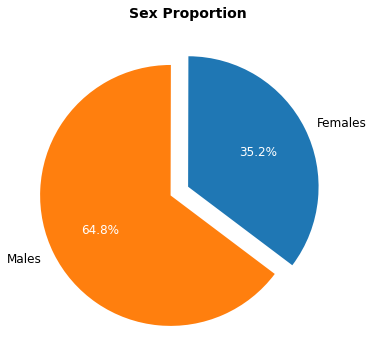

In [5]:
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sex.values, labels=['Females', 'Males'], 
                                   explode=[0, 0.15], autopct=(lambda pct: f'{pct:.1f}%'), startangle=-37);

plt.title('Sex Proportion', size=14, fontweight=600)
plt.setp(texts, size=12)
plt.setp(autotexts, size=12, color='w', fontweight=500);

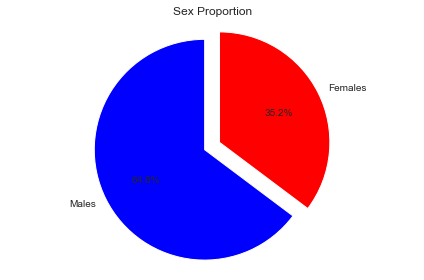

In [22]:
# Original solution:

# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

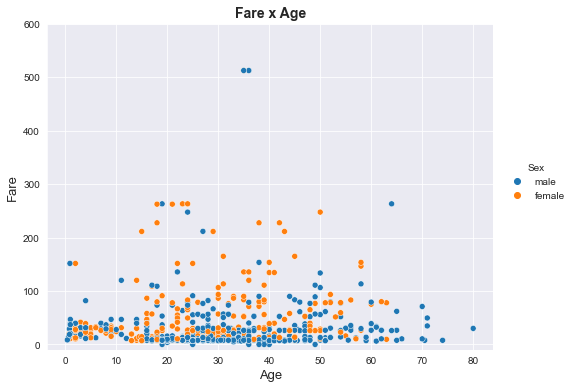

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Sex')

ax.set_title('Fare x Age', size=14, fontweight=600)
ax.set_xlabel('Age', size=13)
ax.set_ylabel('Fare', size=13)
ax.set_ylim(-10, 600)
plt.legend(bbox_to_anchor=(1.18, 0.6), title='Sex', facecolor='w', edgecolor='w');

(-5.0, 85.0)

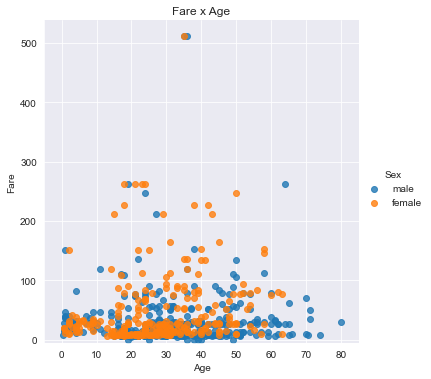

In [23]:
# Original solution:

# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

### Step 7. How many people survived?

In [7]:
titanic['Survived'].sum()

342

### Step 8. Create a histogram with the Fare payed

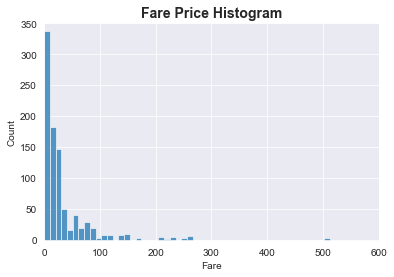

In [8]:
ax = sns.histplot(titanic['Fare'], bins=50);

ax.set_xlim(0, 600)
ax.set_ylim(-2, 350)

ax.set_title('Fare Price Histogram', size=14, fontweight=600);

### BONUS: Create your own question and answer it.

In [9]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
adults = titanic[titanic['Age'] >= 18][['Pclass', 'Survived', 'Sex']]
adults.reset_index(drop=True, inplace=True)

In [11]:
adults

,Pclass,Survived,Sex
0,3,0,male
1,1,1,female
2,3,1,female
3,1,1,female
4,3,0,male
...,...,...,...
596,3,0,female
597,2,0,male
598,1,1,female
599,1,1,male


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


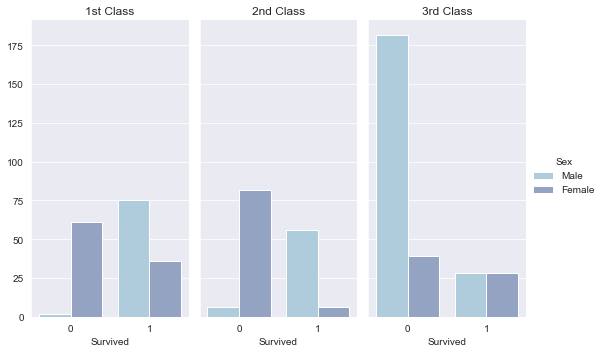

In [12]:
g = sns.FacetGrid(data=adults, col='Pclass', height=5, aspect=0.5)
g.map_dataframe(sns.countplot, 'Survived', hue='Sex', order=[0, 1], palette=['#a6cee3', '#8da0cb'])
g.add_legend(labels=['Male', 'Female'], title='Sex')

axes = g.axes.flatten()
axes[0].set_title("1st Class")
axes[1].set_title("2nd Class")
axes[2].set_title("3rd Class");

In [13]:
survived_adults = titanic[(titanic['Survived'] == 1) & (titanic['Age'] >= 18)][['Pclass', 'Sex']].reset_index(drop=True)
survived_adults.head(3)

,Pclass,Sex
0,1,female
1,3,female
2,1,female


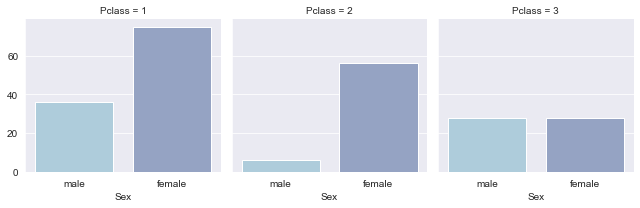

In [14]:
g = sns.FacetGrid(data=survived_adults, col='Pclass')
g.map(sns.countplot, 'Sex', order=['male', 'female'], palette=['#a6cee3', '#8da0cb']);

In [15]:
not_survived_adults = titanic[(titanic['Survived'] == 0) & (titanic['Age'] >= 18)][['Pclass', 'Sex']].reset_index(drop=True)
not_survived_adults.head(3)

,Pclass,Sex
0,3,male
1,3,male
2,1,male


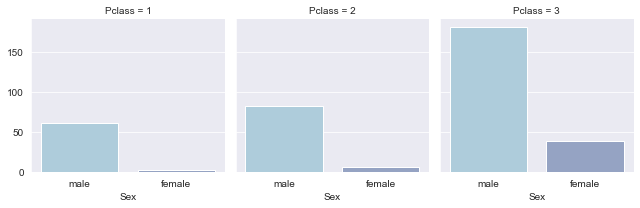

In [16]:
g = sns.FacetGrid(data=not_survived_adults, col='Pclass')
g.map(sns.countplot, 'Sex', order=['male', 'female'], palette=['#a6cee3', '#8da0cb']);

In [17]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
titanic.groupby(['Pclass', 'Sex', 'Survived'])[['Ticket']].count()

Ticket
Pclass Sex    Survived        
1      female 0              3
              1             91
       male   0             77
              1             45
2      female 0              6
              1             70
       male   0             91
              1             17
3      female 0             72
              1             72
       male   0            300
              1             47

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


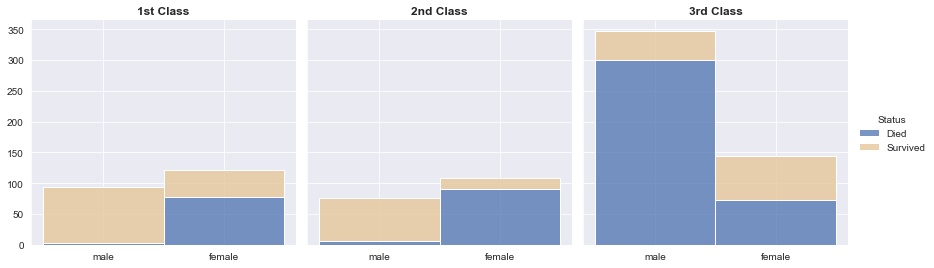

In [20]:
g = sns.FacetGrid(data=titanic, col='Pclass', height=4)
g.map_dataframe(sns.histplot, 'Sex', hue='Survived', hue_order=[1, 0], 
                multiple='stack', palette=['#e5c494', '#4c72b0']);
# g.map_dataframe(plt.hist, 'Sex')
# g.map_dataframe(sns.histplot, 'Survived', hue='Sex', hue_order=['female', 'male'], 
#                 multiple='stack', palette=['#e5c494', '#4c72b0'])
g.add_legend(labels=['Died', 'Survived'], title='Status');

axes = g.axes.flatten()
axes[0].set_title("1st Class", fontweight=600)
axes[1].set_title("2nd Class", fontweight=600)
axes[2].set_title("3rd Class", fontweight=600);
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('');

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


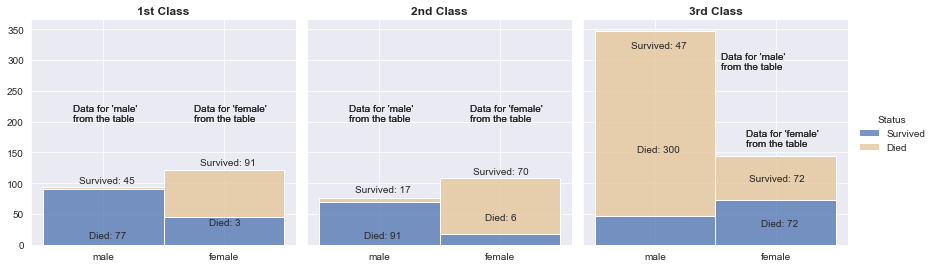

In [21]:
g = sns.FacetGrid(data=titanic, col='Pclass', height=4)
g.map_dataframe(sns.histplot, 'Sex', hue='Survived', hue_order=[0, 1], 
                multiple='stack', palette=['#e5c494', '#4c72b0']);

g.add_legend(labels=['Survived', 'Died'], title='Status')

axes = g.axes.flatten()

axes[0].set_title("1st Class", fontweight=600)
axes[1].set_title("2nd Class", fontweight=600)
axes[2].set_title("3rd Class", fontweight=600);
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('');

axes[0].annotate('Data for \'male\'\nfrom the table', xy=(-0.25, 200));
axes[0].annotate('Data for \'male\'\nfrom the table', xy=(-0.25, 200));
axes[0].annotate('Died: 77', xy=(-0.12, 10));
axes[0].annotate('Survived: 45', xy=(-0.20, 100));

axes[0].annotate('Data for \'female\'\nfrom the table', xy=(0.75, 200));
axes[0].annotate('Data for \'female\'\nfrom the table', xy=(0.75, 200));
axes[0].annotate('Died: 3', xy=(0.88, 32));
axes[0].annotate('Survived: 91', xy=(0.80, 130));

axes[1].annotate('Data for \'male\'\nfrom the table', xy=(-0.25, 200));
axes[1].annotate('Data for \'male\'\nfrom the table', xy=(-0.25, 200));
axes[1].annotate('Died: 91', xy=(-0.13, 10));
axes[1].annotate('Survived: 17', xy=(-0.20, 85));

axes[1].annotate('Data for \'female\'\nfrom the table', xy=(0.75, 200));
axes[1].annotate('Data for \'female\'\nfrom the table', xy=(0.75, 200));
axes[1].annotate('Died: 6', xy=(0.88, 40));
axes[1].annotate('Survived: 70', xy=(0.78, 115));

axes[2].annotate('Data for \'male\'\nfrom the table', xy=(0.55, 285));
axes[2].annotate('Data for \'male\'\nfrom the table', xy=(0.55, 285));
axes[2].annotate('Died: 300', xy=(-0.15, 150));
axes[2].annotate('Survived: 47', xy=(-0.20, 320));

axes[2].annotate('Data for \'female\'\nfrom the table', xy=(0.75, 160));
axes[2].annotate('Data for \'female\'\nfrom the table', xy=(0.75, 160));
axes[2].annotate('Died: 72', xy=(0.88, 30));
axes[2].annotate('Survived: 72', xy=(0.78, 103));

Labels of 1st and 2nd classes should be switched